# Review 
## Python Review

In [4]:
# Carriage return 
import time 

# loop to simulate progress updates
for i in range(0,11): 
    # print progress
    print(f'Progress: {i}/10', end='\r')
    # simulate time 
    time.sleep(1)

print('\nTask complete!')

Progress: 10/10
Task complete!


In [7]:
# format strings 
name = "John"
age = 28 
print("My name is {} and I am {} doll hairs.".format(name,age))
print("My name is %s and I am %d doll hairs." % (name,age))

My name is John and I am 28 doll hairs.
My name is John and I am 28 doll hairs.


In [14]:
# indexing 
name = "John Cena"
print(name[::2]) # collect even indices i = 0,2,4,6, ... 
print(name[0:4:2]) # collect from the range [0-3]

Jh ea
Jh


In [15]:
# print raw data 
print(r"# \ hello 23, '' ")

# \ hello 23, '' 


# Using RegEx & Numpy

In [26]:
import re

""" 
re.search() 
"""

s1 = "John Beresford"

# define pattern 
pattern = r"ford" # using raw string 

# use search()
result = re.search(pattern, s1)

# check if found 
if result:
    print("Found:", result.group(),result)
else: 
    print("Not Found.")

Found: ford <re.Match object; span=(10, 14), match='ford'>


![image.png](../docs/regex.png)

In [36]:
""" 
re.search() 
"""

pattern = r"\d\d\d\d\d\d\d\d\d\d"  # Matches any ten consecutive digits
text = "My Phone number is 1234567890"
match = re.search(pattern, text)

if match:
    print("Phone number found:", match.group())
    print("pattern is consecutive #s")
else:
    print("No match")


""" 
re.findall() Finds all occurrences 
"""
pattern = r"\W"  # Matches any non-word character
text = "Hello, world!"
matches = re.findall(pattern, text)
print("Matches non words:", matches)



s2 = "Michael Jackson was a singer and known as the 'King of Pop'"
pattern = 'as'
# Use the findall() function to find all occurrences of the "as" in the string
result = re.findall(pattern, s2)
# Print out the list of matched words
print('found: ', len(result), result)



"""
re.split() turn things into lists
\s: finds whitespace 
"""
# Use the split function to split the string by the "\s"
split_array = re.split("\s", s2)

# The split_array contains all the substrings, split by whitespace characters
print("list created by white space: ", split_array)


"""
re.sub() to replace 
"""

# Define the regular expression pattern to search for
pattern = r"King of Pop"
# Define the replacement string
replacement = "legend"
# Use the sub function to replace the pattern with the replacement string
new_string = re.sub(pattern, replacement, s2, flags=re.IGNORECASE)
# The new_string contains the original string with the pattern replaced by the replacement string
print("Using sub: " , new_string) 

Phone number found: 1234567890
pattern is consecutive #s
Matches non words: [',', ' ', '!']
found:  2 ['as', 'as']
list created by white space:  ['Michael', 'Jackson', 'was', 'a', 'singer', 'and', 'known', 'as', 'the', "'King", 'of', "Pop'"]
Using sub:  Michael Jackson was a singer and known as the 'legend'


> I lost data between this and numpy arrays: we morn 

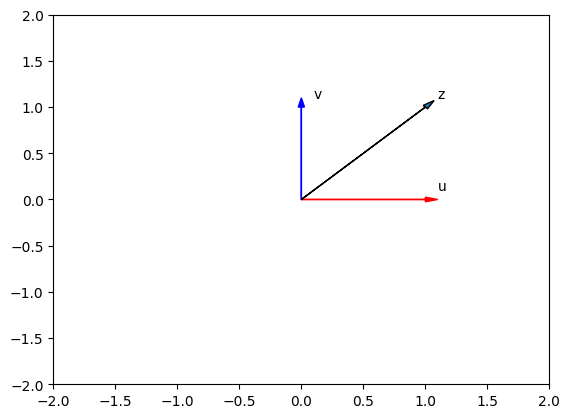

In [6]:

import time 
import sys
import numpy as np 

import matplotlib.pyplot as plt


def Plotvec1(u, z, v):
    
    ax = plt.axes() # to generate the full window axes
    ax.arrow(0, 0, *u, head_width=0.05, color='r', head_length=0.1)# Add an arrow to the  U Axes with arrow head width 0.05, color red and arrow head length 0.1
    plt.text(*(u + 0.1), 'u')#Adds the text u to the Axes 
    
    ax.arrow(0, 0, *v, head_width=0.05, color='b', head_length=0.1)# Add an arrow to the  v Axes with arrow head width 0.05, color red and arrow head length 0.1
    plt.text(*(v + 0.1), 'v')#Adds the text v to the Axes 
    
    ax.arrow(0, 0, *z, head_width=0.05, head_length=0.1)
    plt.text(*(z + 0.1), 'z')#Adds the text z to the Axes 
    plt.ylim(-2, 2)#set the ylim to bottom(-2), top(2)
    plt.xlim(-2, 2)#set the xlim to left(-2), right(2)

u = np.array([1, 0])
v = np.array([0, 1])
z = np.add(u, v)

Plotvec1(u, z, v)

![dim](../docs/dim.png)

In [15]:
# notice dimension is number of nested lists 
#       1st dim is the outer list - holding 3 lists 
#       2nd dim is is the 3 lists 
# shape give 3 by 3 of the inner dim 
import numpy as np

A = [ [1,2,3] ]
A = np.array(A)
B = [ [1,2,3], [4,5,6]]
B = np.array(B)
C = [ [1,2,3], [4,5,6], [7,8,9] ]
C = np.array(C)
# A[row,column]
print(A.ndim, A.shape)
print(B.ndim, B.shape)
print(C.ndim, C.shape)

2 (1, 3)
2 (2, 3)
2 (3, 3)


In [19]:
X=np.array([[1,0],[0,1]]) 

Y=np.array([[2,1],[1,2]]) 

Z=np.dot(X,Y) 
print(Z)

[[2 1]
 [1 2]]


# Using APIs

## NFL API

In [29]:
import pandas as pd 
import matplotlib.pyplot as plt
from nba_api.stats.static import teams # api call to get teams
from nba_api.stats.endpoints import leaguegamefinder # api call to get game


In [30]:
# function that takes a list and returns a dictionary 
def one_dict(list_dict):
    keys=list_dict[0].keys()
    out_dict={key:[] for key in keys}
    for dict_ in list_dict:
        for key, value in dict_.items():
            out_dict[key].append(value)
    return out_dict

In [31]:
# grab teams from nba api
nba_teams = teams.get_teams()
# convert list to dict
dict_nba_team=one_dict(nba_teams)
# convert dict to DataFrame
df_teams=pd.DataFrame(dict_nba_team)
# view
df_teams

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966
5,1610612742,Dallas Mavericks,DAL,Mavericks,Dallas,Texas,1980
6,1610612743,Denver Nuggets,DEN,Nuggets,Denver,Colorado,1976
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946
8,1610612745,Houston Rockets,HOU,Rockets,Houston,Texas,1967
9,1610612746,Los Angeles Clippers,LAC,Clippers,Los Angeles,California,1970


In [32]:
# find via nickname goal is to get id 
df_warriors=df_teams[df_teams['nickname']=='Warriors']
df_warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


In [33]:
id_warriors=df_warriors[['id']].values[0][0]
# we now have an integer that can be used to request the Warriors information 
id_warriors

1610612744

In [38]:
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_warriors)
"""
The parameter team_id_nullable is the unique ID for the warriors. 

Under the hood, the NBA API is making a HTTP request.
The information requested is provided and is transmitted via an 
HTTP response this is assigned to the object game finder
"""
# view the json that's being sent or received
# gamefinder.get_json()
games = gamefinder.get_data_frames()[0]
""" 
The game finder object has a method get_data_frames(),
 that returns a dataframe. If we view the dataframe, 
 we can see it contains information about all the games the 
 Warriors played. The PLUS_MINUS column contains information 
 on the score, if the value is negative, the Warriors lost by 
 that many points, if the value is positive, the warriors won 
 by that amount of points. The column MATCHUP has the team the 
 Warriors were playing, GSW stands for Golden State Warriors and 
 TOR means Toronto Raptors. vs signifies it was a home game and the
 @ symbol means an away game.
"""
games

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,52023,1610612744,GSW,Golden State Warriors,0052300131,2024-04-16,GSW @ SAC,L,239,94,...,0.783,8.0,34.0,42.0,19,5,3,16,17,-24.0
1,22023,1610612744,GSW,Golden State Warriors,0022301198,2024-04-14,GSW vs. UTA,W,239,123,...,0.826,12.0,30.0,42.0,35,10,6,9,14,7.0
2,22023,1610612744,GSW,Golden State Warriors,0022301182,2024-04-12,GSW vs. NOP,L,240,109,...,0.762,11.0,42.0,53.0,27,6,5,16,15,-5.0
3,22023,1610612744,GSW,Golden State Warriors,0022301169,2024-04-11,GSW @ POR,W,240,100,...,0.800,10.0,36.0,46.0,24,8,13,16,18,8.0
4,22023,1610612744,GSW,Golden State Warriors,0022301155,2024-04-09,GSW @ LAL,W,241,134,...,0.667,4.0,38.0,42.0,37,3,12,15,17,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3698,21983,1610612744,GOS,Golden State Warriors,0028300048,1983-11-05,GOS vs. NYK,W,240,102,...,0.711,25.0,18.0,43.0,20,16,4,17,27,NaN
3699,21983,1610612744,GOS,Golden State Warriors,0028300040,1983-11-03,GOS @ UTH,L,240,112,...,0.880,27.0,26.0,53.0,22,11,4,19,31,NaN
3700,21983,1610612744,GOS,Golden State Warriors,0028300029,1983-11-01,GOS @ KCK,L,240,114,...,0.750,12.0,18.0,30.0,29,15,3,16,28,NaN
3701,21983,1610612744,GOS,Golden State Warriors,0028300013,1983-10-29,GOS vs. POR,W,240,97,...,0.725,12.0,31.0,43.0,21,9,1,16,37,NaN


In [39]:
import requests

filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%205/Labs/Golden_State.pkl"

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

download(filename, "Golden_State.pkl")

In [40]:
file_name = "Golden_State.pkl"
games = pd.read_pickle(file_name)
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612744,GSW,Golden State Warriors,1521900066,2019-07-12,GSW vs. LAL,L,200,87,...,0.800,13.0,29.0,42.0,13,10.0,3,11.0,21,3.2
1,22019,1610612744,GSW,Golden State Warriors,1521900058,2019-07-10,GSW @ DEN,W,201,73,...,0.867,7.0,27.0,34.0,10,11.0,7,20.0,20,-8.0
2,22019,1610612744,GSW,Golden State Warriors,1521900039,2019-07-08,GSW @ LAL,W,200,88,...,0.621,8.0,29.0,37.0,21,10.0,4,13.0,22,8.0
3,22019,1610612744,GSW,Golden State Warriors,1521900020,2019-07-07,GSW vs. TOR,W,201,80,...,0.923,6.0,37.0,43.0,18,8.0,3,20.0,25,10.0
4,22019,1610612744,GSW,Golden State Warriors,1521900007,2019-07-05,GSW vs. CHA,L,200,85,...,0.889,8.0,28.0,36.0,19,9.0,3,13.0,15,-8.0


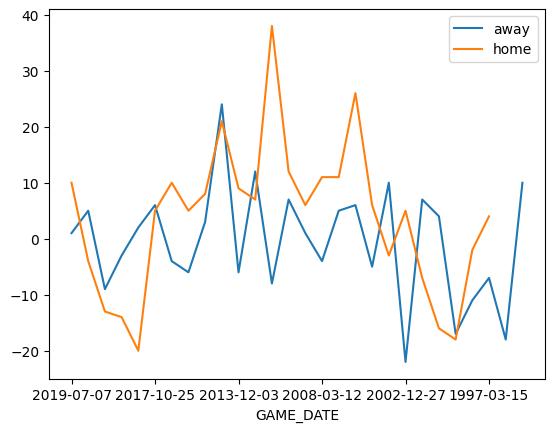

In [41]:
games_home=games[games['MATCHUP']=='GSW vs. TOR']
games_away=games[games['MATCHUP']=='GSW @ TOR']
fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()

## GDP API
> Webscraping example 

Goal: 
Create a script that can extract the list of the top 10 largest economies of the world in descending order for their Gross Domestic Products (GDPs) in Billion USD rounded to 2 decimal places, as logged by the International Monetary Fund (IMF). 

In [1]:
# Step 1: Identify where data is located 

# For this example we found a wiki  archive "list of countries by GDP nominal"
#       The information we're interested in is listed in a provided table 
#       we are also interested in the provided plots 

# wiki_GDP_URL : https://web.archive.org/web/20230902185326/https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28nominal%29

wki_GDP_URL = 'https://web.archive.org/web/20230902185326/https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28nominal%29'


In [90]:
# Step 2: Extract data from web using Pandas api 

# Import read_html 
#       - input: io 
#           - string path obj URL or HTML 
#       - return: a list of DATA FRAME objects 
from pandas import read_html

all_data_frames = read_html(wki_GDP_URL)
print('# of data frames found: ', len(all_data_frames))
all_data_frames[3]

# of data frames found:  8


Country/Territory UN region IMF[1][13]            World Bank[14]  \
    Country/Territory UN region   Estimate       Year       Estimate   
0               World         —  105568776       2023      100562011   
1       United States  Americas   26854599       2023       25462700   
2               China      Asia   19373586  [n 1]2023       17963171   
3               Japan      Asia    4409738       2023        4231141   
4             Germany    Europe    4308854       2023        4072192   
..                ...       ...        ...        ...            ...   
209          Anguilla  Americas          —          —              —   
210          Kiribati   Oceania        248       2023            223   
211             Nauru   Oceania        151       2023            151   
212        Montserrat  Americas          —          —              —   
213            Tuvalu   Oceania         65       2023             60   

               United Nations[15]             
          Year           Estimate       Year  
0         2022           96698005       2021  
1         2022           23315081       2021  
2    [n 3]2022           17734131  [n 1]2021  
3         2022            4940878       2021  
4         2022            4259935       2021  
..         ...                ...        ...  
209          —                303       2021  
210       2022                227       2021  
211       2022                155       2021  
212          —                 72       2021  
213       2022                 60       2021  

[214 rows x 8 columns]

In [91]:
# Step 3: Isolate the data of interest 

# Table 3 contains the DOI 
table3 = all_data_frames[3]
table3

Country/Territory UN region IMF[1][13]            World Bank[14]  \
    Country/Territory UN region   Estimate       Year       Estimate   
0               World         —  105568776       2023      100562011   
1       United States  Americas   26854599       2023       25462700   
2               China      Asia   19373586  [n 1]2023       17963171   
3               Japan      Asia    4409738       2023        4231141   
4             Germany    Europe    4308854       2023        4072192   
..                ...       ...        ...        ...            ...   
209          Anguilla  Americas          —          —              —   
210          Kiribati   Oceania        248       2023            223   
211             Nauru   Oceania        151       2023            151   
212        Montserrat  Americas          —          —              —   
213            Tuvalu   Oceania         65       2023             60   

               United Nations[15]             
          Year           Estimate       Year  
0         2022           96698005       2021  
1         2022           23315081       2021  
2    [n 3]2022           17734131  [n 1]2021  
3         2022            4940878       2021  
4         2022            4259935       2021  
..         ...                ...        ...  
209          —                303       2021  
210       2022                227       2021  
211       2022                155       2021  
212          —                 72       2021  
213       2022                 60       2021  

[214 rows x 8 columns]

In [92]:
# Process the data 

# Replace the column headers with column numbers
table3.columns = range(table3.shape[1])
table3

,0,1,2,3,4,5,6,7
0,World,—,105568776,2023,100562011,2022,96698005,2021
1,United States,Americas,26854599,2023,25462700,2022,23315081,2021
2,China,Asia,19373586,[n 1]2023,17963171,[n 3]2022,17734131,[n 1]2021
3,Japan,Asia,4409738,2023,4231141,2022,4940878,2021
4,Germany,Europe,4308854,2023,4072192,2022,4259935,2021
...,...,...,...,...,...,...,...,...
209,Anguilla,Americas,—,—,—,—,303,2021
210,Kiribati,Oceania,248,2023,223,2022,227,2021
211,Nauru,Oceania,151,2023,151,2022,155,2021
212,Montserrat,Americas,—,—,—,—,72,2021


In [93]:
# process the data 

# # Retain columns with index 0 and 2 (name of country and value of GDP quoted by IMF)
table3 = table3[[0,2]]
table3


,0,2
0,World,105568776
1,United States,26854599
2,China,19373586
3,Japan,4409738
4,Germany,4308854
...,...,...
209,Anguilla,—
210,Kiribati,248
211,Nauru,151
212,Montserrat,—


In [94]:
# Retain the Rows with index 1 to 10, indicating the top 10 economies of the world.
table3 = table3.iloc[1:11,:]

# Assign column names as "Country" and "GDP (Million USD)"
table3.columns = ['Country','GDP (Million USD)']
table3

,Country,GDP (Million USD)
1,United States,26854599
2,China,19373586
3,Japan,4409738
4,Germany,4308854
5,India,3736882
6,United Kingdom,3158938
7,France,2923489
8,Italy,2169745
9,Canada,2089672
10,Brazil,2081235


In [95]:
# process the data 

# Change the data type of the 'GDP (Million USD)' column to integer. Use astype() method.
# view types 
print(table3.dtypes)
print("Current table type : ", type(table3['GDP (Million USD)'][2]),table3['GDP (Million USD)'][2])

# Overwrite the type 
table3['GDP (Million USD)'] =  table3['GDP (Million USD)'].astype(int)
# view types 
print(table3.dtypes)
print("Current table type : ", type(table3['GDP (Million USD)'][2]),table3['GDP (Million USD)'][2])


# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

Country              object
GDP (Million USD)    object
dtype: object
Current table type :  <class 'str'> 19373586
Country              object
GDP (Million USD)     int32
dtype: object
Current table type :  <class 'numpy.int32'> 19373586


In [96]:
# Convert the GDP value in Million USD to Billion USD
table3['GDP (Million USD)'] = table3['GDP (Million USD)']/1e3
# table3

# Use numpy.round() method to round the value to 2 decimal places.
table3['GDP (Million USD)'] = round(table3['GDP (Million USD)'],2)
table3

# Rename the column header from 'GDP (Million USD)' to 'GDP (Billion USD)'
table3.rename({'GDP (Million USD)': 'GDP (Billion USD)'}, axis=1, inplace=True)
table3



,Country,GDP (Billion USD)
1,United States,26854.60
2,China,19373.59
3,Japan,4409.74
4,Germany,4308.85
5,India,3736.88
6,United Kingdom,3158.94
7,France,2923.49
8,Italy,2169.74
9,Canada,2089.67
10,Brazil,2081.24


In [97]:
# Load the DataFrame to the CSV file named "Largest_economies.csv"
table3.to_csv("Largest_economies.csv")